In order to successfully complete this assignment, you must follow all the instructions in this notebook and upload your edited ipynb file to [D2L](http://d2l.msu.edu/) with your answers on or before **10:00am on Friday, April 1st**.


# Homework 4: Projection and Diagonalization

In [180]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import sympy as sym
#sym.init_printing(use_unicode=True)

In [181]:
import os.path
from urllib.request import urlretrieve
if not os.path.isfile("answercheck.py"):
    urlretrieve('https://raw.githubusercontent.com/colbrydi/jupytercheck/master/answercheck.py', 'answercheck.py');

In [182]:
# import for checking answers
from answercheck import checkanswer

# 1. Projection (35 pts)

Given the vector $v=[1,4,-1]^\top$ and the plane $W = \{(x_1,x_2,x_3): x_1-2x_2-3x_3=0\},$ in
$\mathbb{R}^3$, we want to find the projection of $v$ onto $W$ using the following steps.



&#9989;  **<font color=red>QUESTION 1.1:</font>** (5 pts) In the markdown cell below, explain why $W$ forms a vector space and what the dimension of this space is.

Since it satisfies the two requirements of scalar multiplication and scalar adition it forms a vector space.

&#9989;  **<font color=red>QUESTION 1.2:</font>** (5 pts) What is a matrix $A$ such that $W$ is the nullspace of $A$? 

In [183]:
#put your answer here
A = np.matrix([1,-2,-3])

&#9989;  **<font color=red>QUESTION 1.3:</font>** (5 pts)
Find two arbitrary vectors in the plane $W$ that are not parallel to each other.

In [184]:
# Put your answer to the above question here
v1 = [2,4,-2]
v2 = [8,1,2]

&#9989;  **<font color=red>QUESTION 1.4:</font>** (5 pts)
Orthogonalize `v1` and `v2` by applying the Gram-Schmidt process. Store the resulting orthonormal vectors as `w1` and `w2`

In [185]:
#Put your answer to the above question here
w1=v1/np.dot(v1,v1)**(0.5)
result = v2 - (np.dot(v2,w1))*w1
w2=(result)/np.dot(result,result)**(0.5)



&#9989;  **<font color=red>QUESTION 1.5:</font>** (5 pts) Use python to verify that {`w1`,`w2`} is indeed an orthonormal basis of the plane $W$. Specifically, verify

-  each basis vector has unit length 
-  orthogonality between different basis vectors.
-  `w1`, `w2` $\in W$ 

In [186]:
print(np.linalg.norm(w1)==1)
print(np.allclose(np.dot(w1,w2),0))
print(np.allclose(np.dot(w1,w1),1))
print(np.allclose(np.dot(w2,w2),1))



True
True
True
True


Recall that in Pre-class 15, the following mathematical definition of projection onto a subspace was defined.

**Definition**: Let $W$ be a subspace of $R^n$ of dimension $m$. Let $\{w_1,\cdots,w_m\}$ be an orthonormal basis for $W$. Then the projection of vector $v$ in $R^n$ onto $W$ is denoted as $\mbox{proj}_Wv$ and is defined as 
$$\mbox{proj}_Wv = (v\cdot w_1)w_1+(v\cdot w_2)w_2+\cdots+(v\cdot w_m)w_m$$


&#9989;  **<font color=red>QUESTION 1.6:</font>** (5 pts) Use this formula to find $P_W v$, the projection of $v=[1,4,-1]^T$ onto $W$.


In [187]:
# Put your answer to the above question here
v = [1,4,-1]
Pwv = np.dot(v,w1)*(w1) + np.dot(v,w2)*(w2)
Pwv

array([ 1.28571429,  3.42857143, -1.85714286])

&#9989;  **<font color=red>QUESTION 1.7:</font>** (5 pts) What is the geometric meaning of $v-P_W v$? Use this to find the distance from $v$ to $W$.

In [188]:
#Put your code here
distance = np.linalg.norm(v-Pwv)
distance

1.0690449676496976

# 2. Properties of orthogonal matrices (35 pts)


In pre-class 15, we learned the definition of orthogonal matrices. Let us  review it here.

**Definition:** A $n\times n$ matrix $U$ is orthogonal if the columns of $U$ form an orthonormal basis of  $\mathbb {R} ^{n}$.

Orthogonal matrices have many alternative definitions. Explictly, the following conditions are all equivalent.

- $U$ is orthogonal

- the rows of $U$ form an orthonormal basis of  $\mathbb {R} ^{n}$.

- the columns of $U$ form an orthonormal basis of  $\mathbb {R} ^{n}$.

- Given two vectors $x$ and $y$ in $\mathbb{R}^n$, multiplication by U preserves their dot product; that is, $(Ux)\cdot (Uy) = x \cdot y$.
 
- U is invertible, and $U^T = U^{-1}$.

&#9989;  **<font color=red>QUESTION 2.1:</font>** (5 pts) Let $v_1 = [\frac{1}{2}, \frac{1}{2}, \frac{1}{2}, \frac{1}{2}]$, $v_2 = [\frac{1}{2}, \frac{1}{2}, -\frac{1}{2}, -\frac{1}{2}]$,
$v_3 = [\frac{1}{\sqrt 2}, -\frac{1}{\sqrt 2}, 0, 0]$, $v_4 = [0, 0, \frac{1}{\sqrt 2}, -\frac{1}{\sqrt 2}]$.
Use a subset of the above equivalent conditions to verify that $v_1,v_2,v_3$, and $v_4$ form an orthonormal basis of $\mathbb{R}^4$.

In [189]:
v = np.matrix([[1/2,1/2,1/2,1/2], [1/2,1/2,-1/2,-1/2],[1/(2)**(0.5),-1/(2)**(0.5),0,0],[0,0,1/(2)**(0.5),-1/(2)**(0.5)]])
np.allclose(v.T*v, np.identity(v.shape[0]))

True

&#9989;  **<font color=red>QUESTION 2.2:</font>** (5 pts) Use python code  to construct the following two $3\times 3$ transformation matrices: 
+ Rotation matrix `R` that rotates a given vector in $\mathbb{R}^3$ around the $x$-axis counter-clockwise by an angle of $60^\circ$ 
+ Reflection matrix `F` that reflects a given vector in $\mathbb{R}^3$ with respect to the $y$-$z$ plane.

In [190]:
theta = 60 *(np.pi/180)
R = np.matrix([[1,0,0],[0,np.cos(theta), -np.sin(theta)],[0,np.sin(theta),np.cos(theta)]])
F = np.matrix([[-1,0,0],[0,1,0],[0,0,1]])

print(R)
print(F)

[[ 1.         0.         0.       ]
 [ 0.         0.5       -0.8660254]
 [ 0.         0.8660254  0.5      ]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0  1]]


&#9989;  **<font color=red>QUESTION 2.3:</font>** (5 pts) Verify that `R`,`F` and their products `FR`, `RFRF` are all orthogonal. This tells us that any product of orthogonal matrices is still an orthogonal matrix.

In [191]:
print(np.allclose(R*R.T, np.identity(R.shape[0])))
print(np.allclose(F*F.T, np.identity(F.shape[0])))

print(np.allclose((F*R)*(F*R).T, np.identity((R*F).shape[0])))
print(np.allclose((R*F*R*F)*(R*F*R*F).T,np.identity((R*F*R*F).shape[0])))

True
True
True
True


&#9989;  **<font color=red>QUESTION 2.4:</font>** (5 pts) Rotations and reflections are known as rigid motions, meaning that they do not change the length of the vectors being rotated/reflected. This is in fact an intrinsic property of orthogonal matrices and is guaranteed by one of the equivalent conditions of orthogonal matrices listed above. Which condition is that? Be sure to explain your reasoning.

(Hint: for an orthogonal matrix $U$, when we say it does not change the length of the input, we mean $\|Ux\|=\|x\|$ for any $x$, that is, the length of $Ux$ is always the same as the length of $x$. You are asked to find the condition of orthogonal matrices that implies this.)

By multiplying with U you can preserve their dot product.

(Ux).(Uy) = x.y

&#9989;  **<font color=red>QUESTION 2.5:</font>** (10 pts) Find possible values $a,b,c,d,e,f$ such that
$$A = \begin{bmatrix}
1 & a & b \\
c & 0.6 & d \\
e & 0.8 & f
\end{bmatrix}$$
is orthogonal.

In [192]:
a=0
b=0
c=0
d=-0.8
e=0
f=0.6

In [193]:
from answercheck import checkanswer
checkanswer.vector([a,b,c,abs(d),e,f*d], "1592b4d30e72d792d5e5c17c5eb1c4a6");


    Trying to convert to a array matrix using ```A = np.matrix(A)```.


    Converting to positive values of zero using  ```A[A==-0] = 0```.

Testing [[ 0.    0.    0.    0.8   0.   -0.48]]
Answer seems to be correct



&#9989;  **<font color=red>QUESTION 2.6:</font>** (5 pts) Compute the eigenvalues of the matrix with the vectors in QUESTION 2.1 as its columns, as well as the eigenvalues of the matrix `FR` in QUESTION 2.3. What do you find about the magnitudes of the eigenvalues? Could you come up with a theoretical explanation for this phenomenon?

In [194]:
A = np.linalg.eig(v.T)[0]
print(A)
B =np.linalg.eig(F*R)[0]
print(B)

print("magnitude of A =",np.absolute(A))
print("magnitude of B =",np.absolute(B))


[ 1.        +0.j         -0.85355339+0.52100538j -0.85355339-0.52100538j
  1.        +0.j        ]
[ 0.5+0.8660254j  0.5-0.8660254j -1. +0.j       ]
magnitude of A = [1. 1. 1. 1.]
magnitude of B = [1. 1. 1.]


The magnitudes look similar and that is 1 and the eigen values are complex numbers. There are only two real eigen values in both these matrices 1, -1 respectively. This is due to the multiplication by U which prserves their dot product.

# 3. Singular Value Decomposition for Image Restoration (30 pts)


In this question, we will use SVD to remove noise in an image by approximating the image with a low-rank matrix.

First, let's construct an image. 
A grayscale image can be represented by a matrix, whose elements are values between $0$ (black) and $1$ (white). 
Run the following code to see a grayscale image of size $25\times 25$.

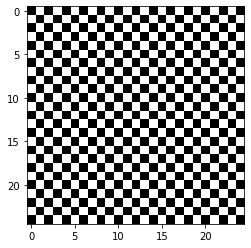

In [195]:
M = np.zeros((25, 25))
M[::2, 1::2] = 1
M[1::2, ::2] = 1
imgPlot = plt.imshow(M, cmap='gray')
plt.show()

&#9989; <font color=red>**Question 3.1:**</font> (5 pts) Find the rank of this matrix $M$ (the grayscale image). 

In [196]:
#####Start your code here #####
rank = np.linalg.matrix_rank(M)
print(rank)

#####End of your code here#####

2


&#9989; <font color=red>**Question 3.2:**</font> (10 pts) Find an approximation of the image with only one singular value. What happens? Why?  

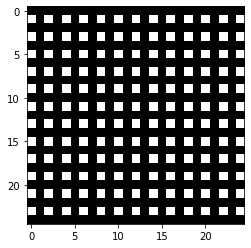

In [197]:
#####Start your code here #####

U, e, Vt = np.linalg.svd(M)

A =np.matrix(e[0:1]) 
B = np.matrix(U[:,0:1])
C = np.matrix(Vt[0:1,:])

M_modified = B@A@C

plt.imshow(M_modified, cmap='gray')
plt.show()
#####End of your code here#####

The lines get thicker and since there are less singular value the image is not clearly depicted.

Since this grayscale image can be represented as a low-rank matrix. We can use the singular value decomposition to remove random noise that corrupts the image. The following code adds Gaussian noise onto the image.

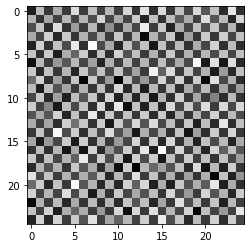

In [198]:
Mn = M + 0.15* np.random.randn(M.shape[0],M.shape[1])

plt.imshow(Mn, cmap='gray')
plt.show()

&#9989; <font color=red>**Question 3.3:**</font> (5 pts) Plot the singular values of this noisy image. What do you observe? 

Text(0, 0.5, 'singular value')

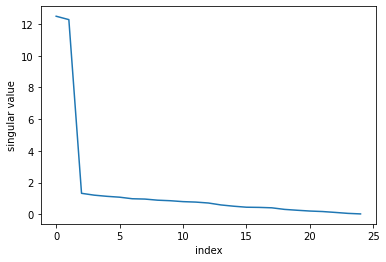

In [199]:
#####Start your code here #####

U, e, Vt = np.linalg.svd(Mn)

plt.plot(e)

#plt.gca().set_yscale('log')
plt.xlabel('index')
plt.ylabel('singular value')
#####End of your code here#####

There is less noise at the first two singular values when compared to other values.

We think the main signal is contained in large singular values and the noise is in small singular values. So we would like to keep only the largest singular values. 
From the previous tasks, we know the rank of the original image. Let's apply that rank to the corrupted image, and see the results.

&#9989; <font color=red>**Question 3.4:**</font> (10 pts) Find an approximation of the noisy image with only the first few singular values. Print the distances (using norm) between the noisy image and clean image as well as between the denoised image and clean image to see at what rank do you get a denoised image that is closest to the original image. Display the noisy and denoised results. 

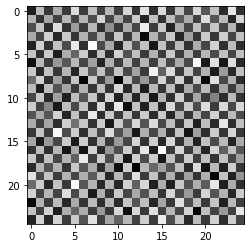

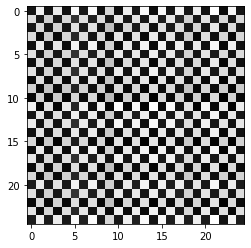

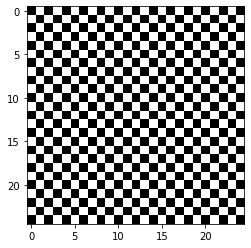

distance between the noisy image and the clear image = 3.7549104910316013
distance between the denoised image and the clear image = 1.3693040378617898
rank = 25


In [200]:
#####Start your code here #####
U, e, Vt = np.linalg.svd(Mn)

A =np.diag(e[0:2]) 
B = np.matrix(U[:,0:2])
C = np.matrix(Vt[0:2,:])


Mdn_modified = B@A@C

plt.imshow(Mn, cmap='gray') 
plt.show()

plt.imshow(Mdn_modified, cmap='gray')
plt.show()

plt.imshow(M, cmap='gray')
plt.show()

print("distance between the noisy image and the clear image =",np.linalg.norm(Mn - M))

D = np.linalg.norm(Mdn_modified - M)
print("distance between the denoised image and the clear image =",D)

rank = np.linalg.matrix_rank(Mn)
print("rank =",rank)
#####End of your code here#####

### Congratulations, we're done!